In [1]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

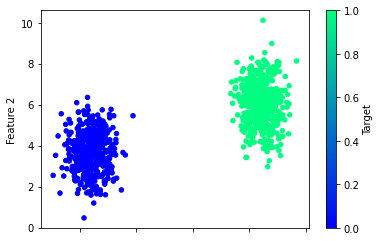

In [2]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DF with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [3]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [4]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [5]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()

In [6]:
# Add our first Dense layer, including the input layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [7]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [8]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 542us/step - loss: 0.7188 - accuracy: 0.4320
Epoch 2/100
24/24 [==============================] - 0s 500us/step - loss: 0.7074 - accuracy: 0.4547
Epoch 3/100
24/24 [==============================] - 0s 500us/step - loss: 0.6978 - accuracy: 0.4840
Epoch 4/100
24/24 [==============================] - 0s 500us/step - loss: 0.6897 - accuracy: 0.5293
Epoch 5/100
24/24 [==============================] - 0s 500us/step - loss: 0.6824 - accuracy: 0.5587
Epoch 6/100
24/24 [==============================] - 0s 500us/step - loss: 0.6758 - accuracy: 0.5813
Epoch 7/100
24/24 [==============================] - 0s 542us/step - loss: 0.6689 - accuracy: 0.6213
Epoch 8/100
24/24 [==============================] - 0s 542us/step - loss: 0.6614 - accuracy: 0.6640
Epoch 9/100
24/24 [==============================] - 0s 500us/step - loss: 0.6522 - accuracy: 0.6933
Epoch 10/100
24/24 [==============================] - 0s 542us/step - loss: 0.6414 - accura

24/24 [==============================] - 0s 542us/step - loss: 0.0981 - accuracy: 1.0000
Epoch 82/100
24/24 [==============================] - 0s 542us/step - loss: 0.0965 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 542us/step - loss: 0.0949 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 542us/step - loss: 0.0933 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 542us/step - loss: 0.0918 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 542us/step - loss: 0.0904 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 583us/step - loss: 0.0889 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 583us/step - loss: 0.0875 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 500us/step - loss: 0.0861 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 542us/step - loss: 0.0847 - accuracy: 

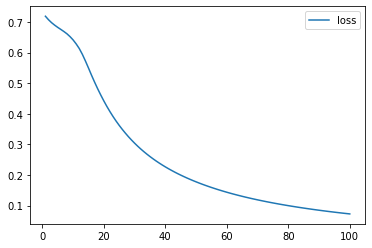

In [11]:
# Create a DF containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1, len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

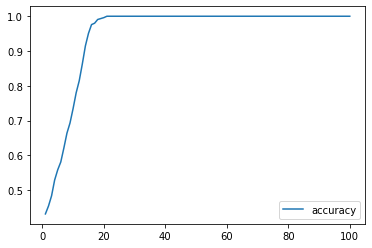

In [12]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [13]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0681 - accuracy: 1.0000
Loss: 0.06812155246734619, Accuracy: 1.0


In [14]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

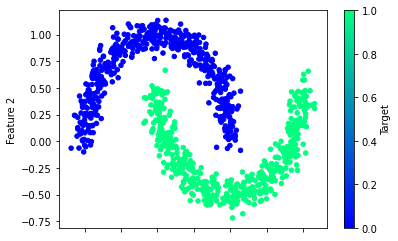

In [16]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DF to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [17]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [18]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 792us/step - loss: 0.7691 - accuracy: 0.6147
Epoch 2/100
24/24 [==============================] - ETA: 0s - loss: 0.5671 - accuracy: 0.75 - 0s 750us/step - loss: 0.6699 - accuracy: 0.6520
Epoch 3/100
24/24 [==============================] - 0s 750us/step - loss: 0.6057 - accuracy: 0.6707
Epoch 4/100
24/24 [==============================] - 0s 792us/step - loss: 0.5591 - accuracy: 0.6920
Epoch 5/100
24/24 [==============================] - 0s 792us/step - loss: 0.5250 - accuracy: 0.7080
Epoch 6/100
24/24 [==============================] - 0s 803us/step - loss: 0.4990 - accuracy: 0.7173
Epoch 7/100
24/24 [==============================] - 0s 834us/step - loss: 0.4772 - accuracy: 0.7307
Epoch 8/100
24/24 [==============================] - 0s 792us/step - loss: 0.4585 - accuracy: 0.7427
Epoch 9/100
24/24 [==============================] - 0s 792us/step - loss: 0.4428 - accuracy: 0.7467
Epoch 10/100
24/24 [=============================

Epoch 81/100
24/24 [==============================] - 0s 792us/step - loss: 0.2596 - accuracy: 0.8920
Epoch 82/100
24/24 [==============================] - 0s 792us/step - loss: 0.2594 - accuracy: 0.8920
Epoch 83/100
24/24 [==============================] - 0s 834us/step - loss: 0.2593 - accuracy: 0.8920
Epoch 84/100
24/24 [==============================] - 0s 792us/step - loss: 0.2589 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 792us/step - loss: 0.2588 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 792us/step - loss: 0.2585 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 792us/step - loss: 0.2584 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 792us/step - loss: 0.2582 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 792us/step - loss: 0.2580 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 750us/step - loss: 0.2577

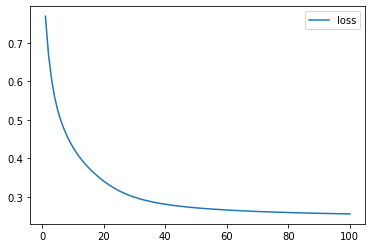

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

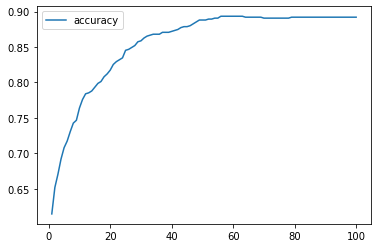

In [20]:
# Plot the loss
history_df.plot(y="accuracy")

In [21]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [22]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [23]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 542us/step - loss: 0.8338 - accuracy: 0.5693
Epoch 2/100
24/24 [==============================] - 0s 500us/step - loss: 0.7954 - accuracy: 0.5973
Epoch 3/100
24/24 [==============================] - 0s 500us/step - loss: 0.7625 - accuracy: 0.6213
Epoch 4/100
24/24 [==============================] - 0s 500us/step - loss: 0.7333 - accuracy: 0.6427
Epoch 5/100
24/24 [==============================] - 0s 542us/step - loss: 0.7052 - accuracy: 0.6587
Epoch 6/100
24/24 [==============================] - 0s 500us/step - loss: 0.6787 - accuracy: 0.6787
Epoch 7/100
24/24 [==============================] - 0s 500us/step - loss: 0.6532 - accuracy: 0.6880
Epoch 8/100
24/24 [==============================] - 0s 500us/step - loss: 0.6268 - accuracy: 0.6947
Epoch 9/100
24/24 [==============================] - 0s 500us/step - loss: 0.6017 - accuracy: 0.6880
Epoch 10/100
24/24 [==============================] - 0s 500us/step - loss: 0.5763 - accura

24/24 [==============================] - 0s 542us/step - loss: 0.2524 - accuracy: 0.8947
Epoch 79/100
24/24 [==============================] - 0s 500us/step - loss: 0.2521 - accuracy: 0.8947
Epoch 80/100
24/24 [==============================] - 0s 542us/step - loss: 0.2519 - accuracy: 0.8947
Epoch 81/100
24/24 [==============================] - 0s 500us/step - loss: 0.2518 - accuracy: 0.8947
Epoch 82/100
24/24 [==============================] - 0s 500us/step - loss: 0.2515 - accuracy: 0.8947
Epoch 83/100
24/24 [==============================] - 0s 500us/step - loss: 0.2514 - accuracy: 0.8933
Epoch 84/100
24/24 [==============================] - 0s 500us/step - loss: 0.2511 - accuracy: 0.8947
Epoch 85/100
24/24 [==============================] - 0s 500us/step - loss: 0.2509 - accuracy: 0.8947
Epoch 86/100
24/24 [==============================] - 0s 458us/step - loss: 0.2507 - accuracy: 0.8947
Epoch 87/100
24/24 [==============================] - 0s 500us/step - loss: 0.2505 - accuracy: 